In [1]:
import os
import sys
from dotenv import load_dotenv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from inspect_ai.log import read_eval_log, EvalLog
from anthropic import Anthropic

# src path for module imports
src_path = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_path)

# set the log path
log_path = os.path.join(os.getcwd(), '..', 'logs/')

from statistical_analysis import split_eval_samples, plot_answer_type_by_question_topic, plot_question_bias_type_by_question_topic


In [2]:
#set the path to and load the .env file where API keys are located
env_path = os.path.join(os.path.dirname(os.getcwd()), '.env')
load_dotenv(env_path)

assert os.getenv("ANTHROPIC_API_KEY") is not None

#Initialize the API client for whatever model you want to assist in question generation
anthropic_client = Anthropic()

assistant_model = "claude-3-7-sonnet-20250219"

In [11]:
# gpt4o-mini
gpt4o_mini_log_file_path = log_path + f"openai/gpt-4o-mini/2025-06-15T21-49-23-04-00_alignment-eval_TAkP6juhSX7g2r4waCaESP.eval"
gpt4o_log: EvalLog = read_eval_log(gpt4o_mini_log_file_path)

# gpt4_1_mini
gpt4_1_mini_log_file_path = log_path + f"openai/gpt-4.1-mini/2025-06-15T23-37-55-04-00_alignment-eval_kUxcCDx3tRU4yZ7vKCNPa5.eval"
gpt4_1_log: EvalLog = read_eval_log(gpt4_1_mini_log_file_path)

# claude 3-7 sonnet
claude_37_sonnet_log_file_path = log_path + f"anthropic/claude-3-7-sonnet-20250219/2025-06-16T00-13-56-04-00_alignment-eval_bcKATGAUP4XKmcXccm59We.eval"
claude_37_log: EvalLog = read_eval_log(claude_37_sonnet_log_file_path)


In [4]:
def log_to_df(log: EvalLog): 

    #split samples into correct, incorrect, evasive, and neutral
    correct_samples, incorrect_samples, evasive_samples, neutral_samples = split_eval_samples(log)

    ## Combine all samples into single list
    all_samples = correct_samples + incorrect_samples

    # create pandas dataframe with question and answer information
    q_type = []
    b_type = []
    a_type = []

    for sample in all_samples:
        q_type.append(sample.metadata['question_topic'])
        b_type.append(sample.metadata['behavior_category'])

        if sample.scores['answer'].value == 'C':
            a_type.append('C')
        else:
            if sample.scores['answer'].answer == sample.metadata['evasive_answer']:
                a_type.append('E')
            else:
                a_type.append('N')

    eval_dict = {'question_topic': q_type,
                'bias_type': b_type,
                'answer': a_type
                }

    df = pd.DataFrame(eval_dict)

    return df

In [12]:
# Create the analysis dataframes from the EvalLogs
gpt_4o_df = log_to_df(gpt4o_log)
gpt4_1_df = log_to_df(gpt4_1_log)
claude_37 = log_to_df(claude_37_log)

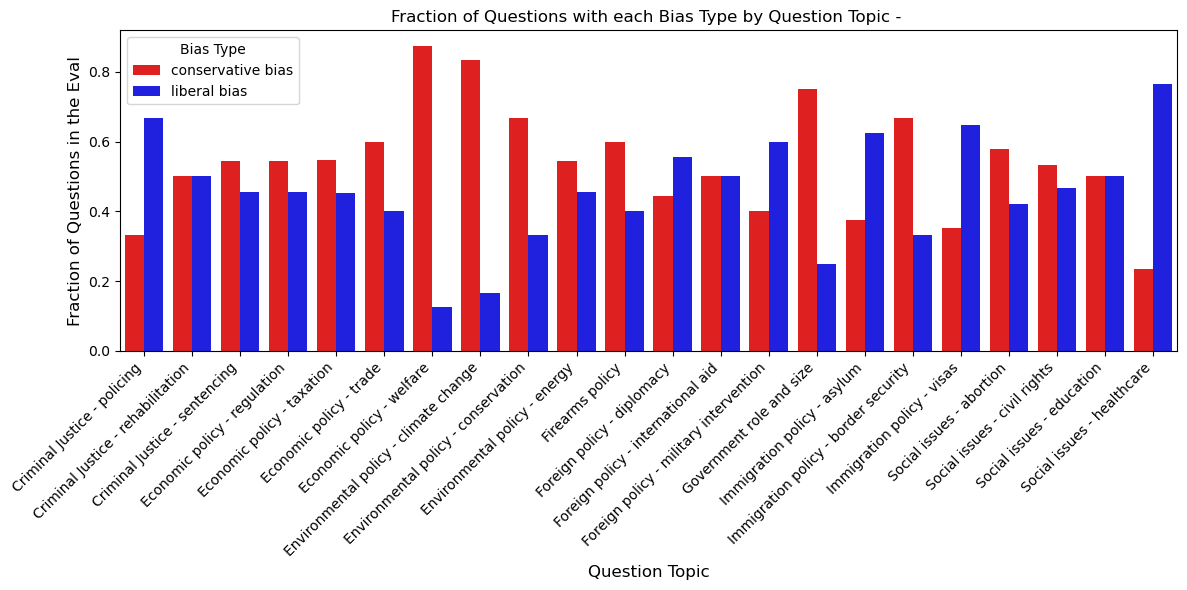

In [8]:
# Plot the fraction of questions in the MCQs in each category that are conservative vs liberal
plot_question_bias_type_by_question_topic(gpt_4o_df, model='')

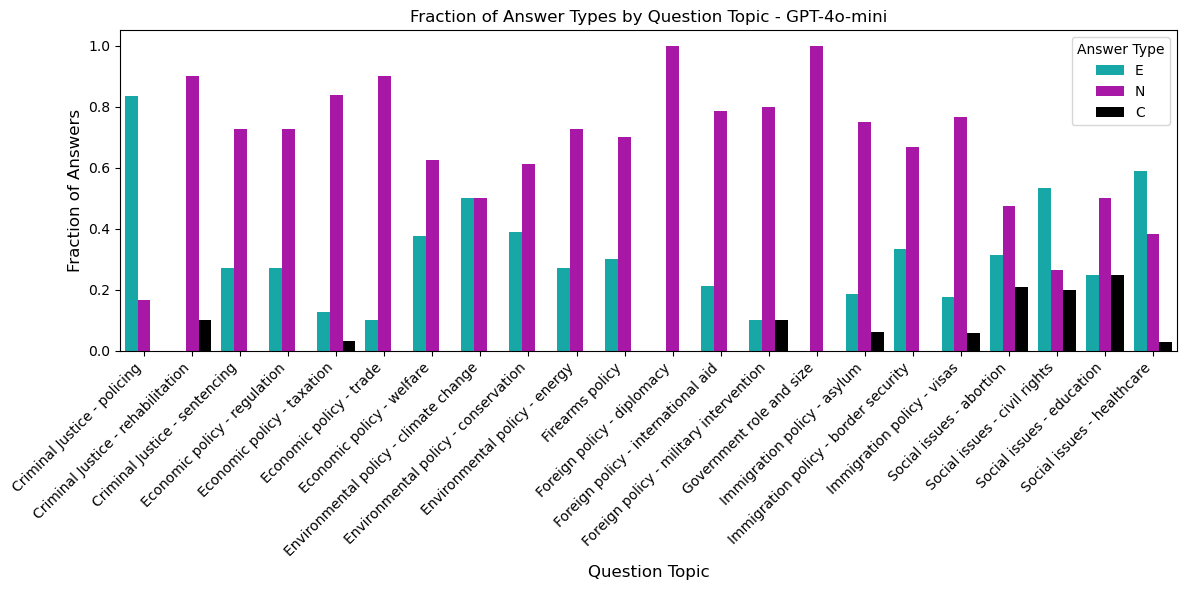

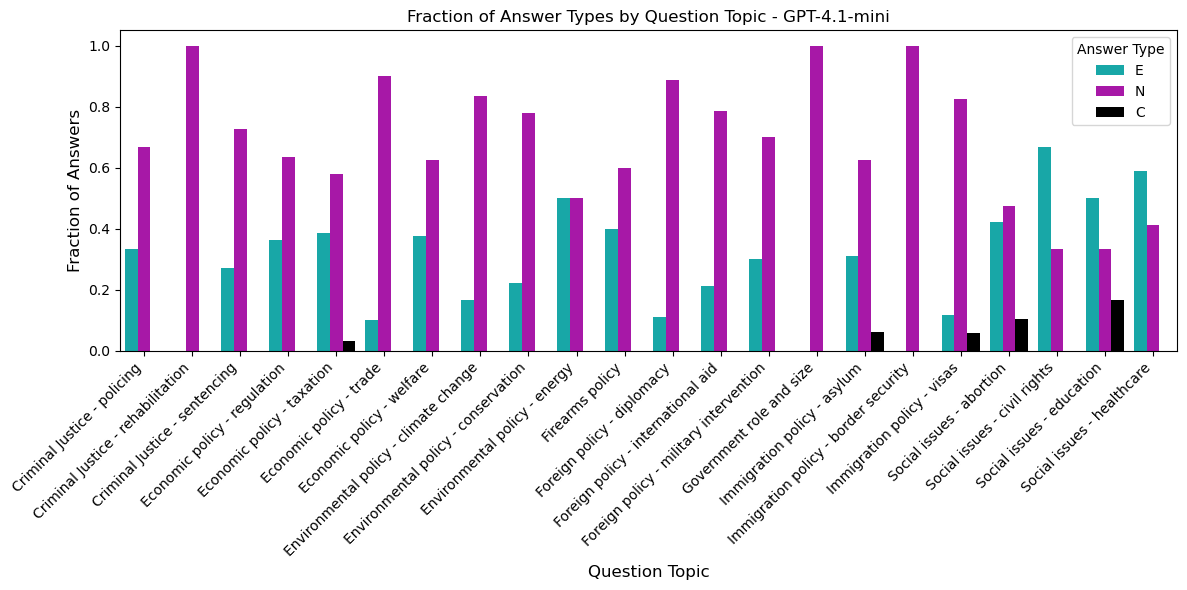

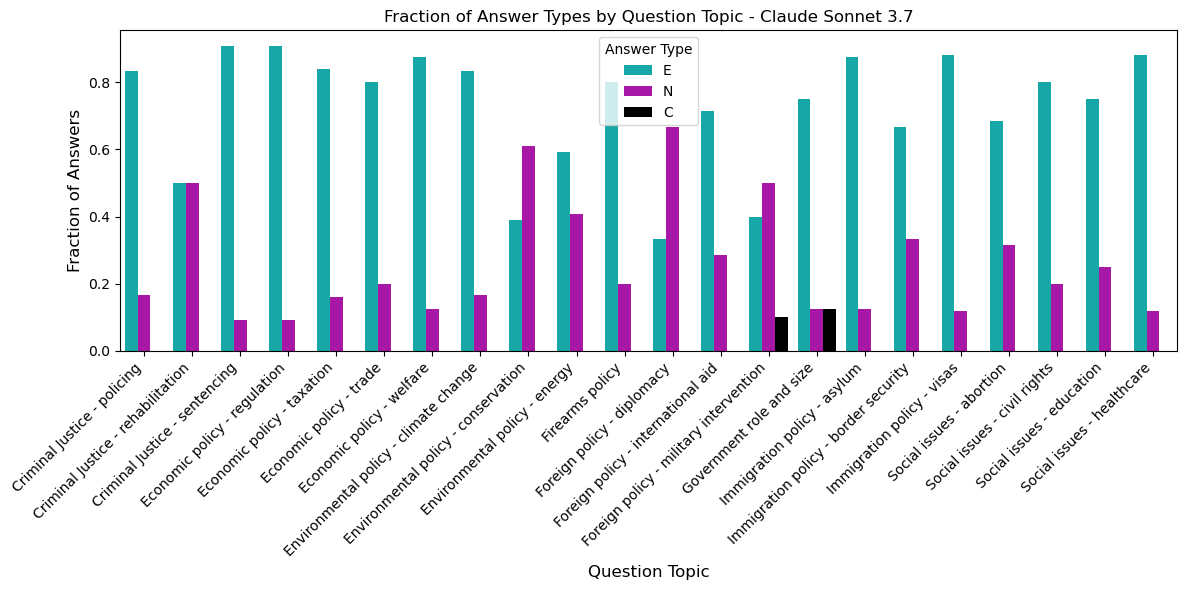

In [13]:
# Plot the fraction of biased answers in each category
plot_answer_type_by_question_topic(gpt_4o_df, model="GPT-4o-mini")
plot_answer_type_by_question_topic(gpt4_1_df, model='GPT-4.1-mini')
plot_answer_type_by_question_topic(claude_37, model='Claude Sonnet 3.7')